## Name : Rohan Singh Rajput and Rohan Vardhan
### House Price Prediction 
Description : This is a notebook for visualization of various features which the sales price of houses. Then data is taken from the "Kaggle House Price Prediction" challenge. 
             
 

**1. Load Data**

First lets import all the libraries that will be used to load train and test datasets and data manipulation.

In [1]:
# Import libraries

# Pandas 
import pandas as pd
from pandas import Series,DataFrame 

# Numpy and Matplotlib
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
#sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning 
from sklearn import preprocessing

Loading train and test data

In [2]:
# Get Data in Dataframe 
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Preview of train and test data

In [3]:
# head() shows the first 5 rows of the data
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,20,RL,60.0,9060,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,120000
1,1,20,FV,81.0,11216,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,New,Partial,232600
2,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2007,WD,Normal,175500
3,3,60,RL,NaN,11214,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,199900
4,4,90,RL,91.0,11643,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,200000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,782,20,RL,86.0,13286,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
1,783,60,RL,58.0,16770,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
2,784,90,RL,78.0,10530,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal
3,785,20,RL,90.0,10768,Pave,NaN,IR1,Lvl,AllPub,...,180,0,NaN,NaN,NaN,0,7,2007,WD,Normal
4,786,20,RL,NaN,13265,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal


There are 1460 entries in the train data set and 1459 entries in test data set. The data contains some NaN values too.

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 81 columns):
Id               782 non-null int64
MSSubClass       782 non-null int64
MSZoning         782 non-null object
LotFrontage      638 non-null float64
LotArea          782 non-null int64
Street           782 non-null object
Alley            39 non-null object
LotShape         782 non-null object
LandContour      782 non-null object
Utilities        782 non-null object
LotConfig        782 non-null object
LandSlope        782 non-null object
Neighborhood     782 non-null object
Condition1       782 non-null object
Condition2       782 non-null object
BldgType         782 non-null object
HouseStyle       782 non-null object
OverallQual      782 non-null int64
OverallCond      782 non-null int64
YearBuilt        782 non-null int64
YearRemodAdd     782 non-null int64
RoofStyle        782 non-null object
RoofMatl         782 non-null object
Exterior1st      782 non-null object
Exterior2nd   

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 80 columns):
Id               196 non-null int64
MSSubClass       196 non-null int64
MSZoning         196 non-null object
LotFrontage      166 non-null float64
LotArea          196 non-null int64
Street           196 non-null object
Alley            12 non-null object
LotShape         196 non-null object
LandContour      196 non-null object
Utilities        196 non-null object
LotConfig        196 non-null object
LandSlope        196 non-null object
Neighborhood     196 non-null object
Condition1       196 non-null object
Condition2       196 non-null object
BldgType         196 non-null object
HouseStyle       196 non-null object
OverallQual      196 non-null int64
OverallCond      196 non-null int64
YearBuilt        196 non-null int64
YearRemodAdd     196 non-null int64
RoofStyle        196 non-null object
RoofMatl         196 non-null object
Exterior1st      196 non-null object
Exterior2nd   

**2. Data Manipulation and Visualization**

Lets check for NaN (null) values in the data

In [7]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      144
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
test.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      30
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64

Lets check for the mean, standard deviation for Sales price

In [9]:
train['SalePrice'].describe()

count       782.000000
mean     183335.726343
std       84405.797663
min       34900.000000
25%      130625.000000
50%      165800.000000
75%      213497.500000
max      755000.000000
Name: SalePrice, dtype: float64

Sales price is right skewed. So, we perform log transformation so that the skewness is nearly zero.

Skew is: 2.1722136377509957


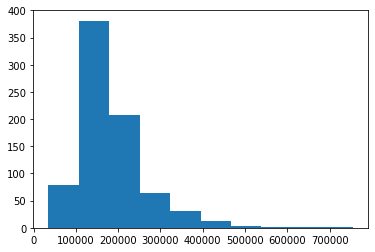

Skew is: 0.13430249335623828


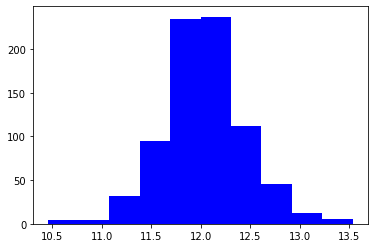

In [10]:
# Determining the Skewness of data 
print ("Skew is:", train.SalePrice.skew())

plt.hist(train.SalePrice)
plt.show()

# After log transformation of the data it looks much more center aligned
train['Skewed_SP'] = np.log(train['SalePrice']+1)
print ("Skew is:", train['Skewed_SP'].skew())
plt.hist(train['Skewed_SP'], color='blue')
plt.show()

/usr/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


20     298
60     160
50      81
120     53
80      31
70      31
160     29
30      28
90      25
190     14
85      10
180      7
75       7
45       6
40       2
Name: MSSubClass, dtype: int64

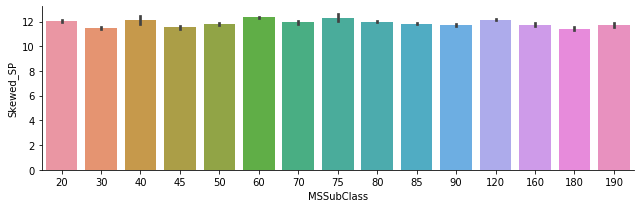

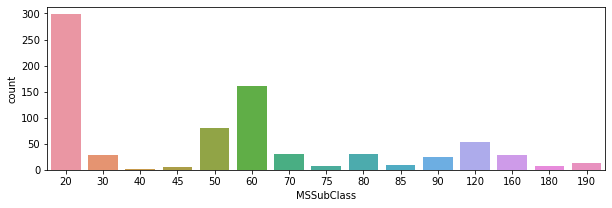

In [11]:
sns.factorplot('MSSubClass', 'Skewed_SP', data=train,kind='bar',size=3,aspect=3)
fig, (axis1) = plt.subplots(1,1,figsize=(10,3))
sns.countplot('MSSubClass', data=train)
train['MSSubClass'].value_counts()

MSSubClass = 60 has highest SalePrice while the sales of houses with MSSubClass = 20 is the highest. 

RL         613
RM         118
FV          37
C (all)      7
RH           7
Name: MSZoning, dtype: int64

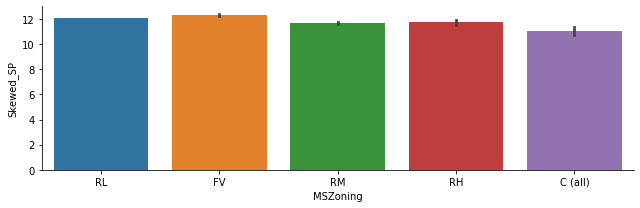

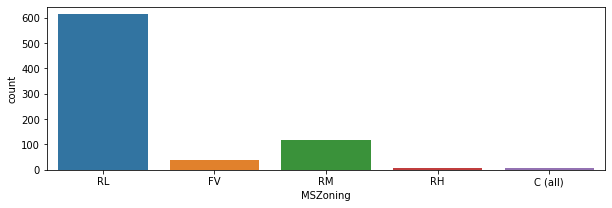

In [12]:
sns.factorplot('MSZoning', 'Skewed_SP', data=train,kind='bar',size=3,aspect=3)
fig, (axis1) = plt.subplots(1,1,figsize=(10,3))
sns.countplot(x='MSZoning', data=train, ax=axis1)
train['MSZoning'].value_counts()

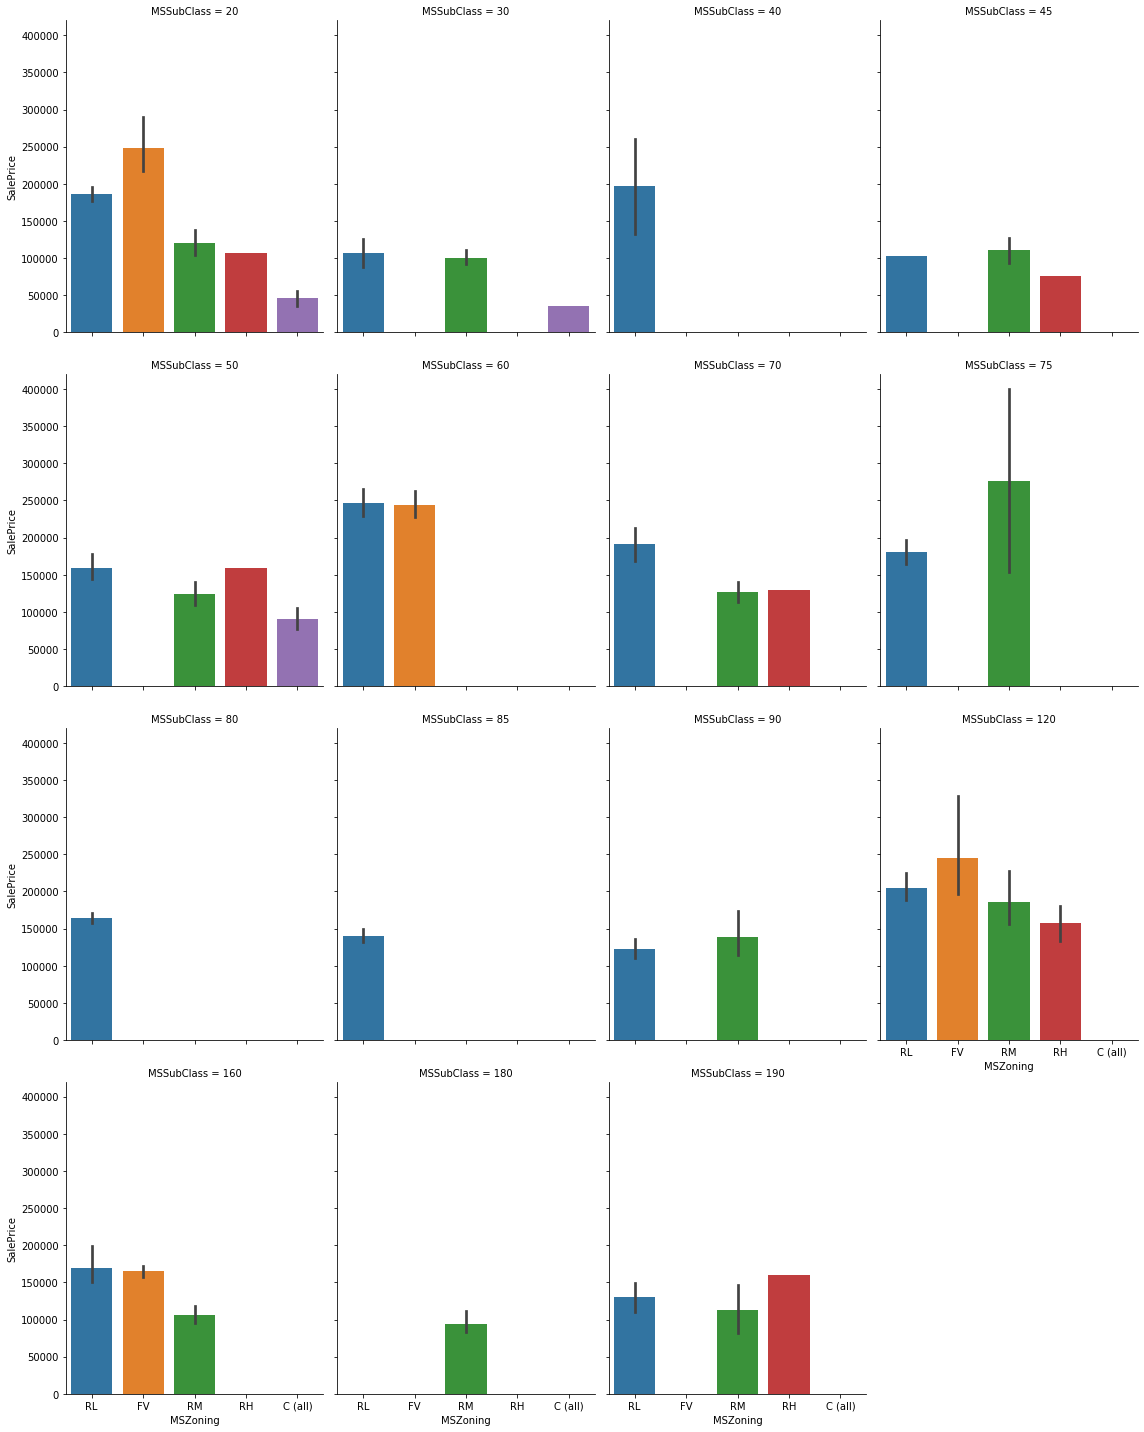

In [13]:
sns.factorplot(x='MSZoning', y='SalePrice', col='MSSubClass', data=train, kind='bar', col_wrap=4, aspect=0.8)

Lets analyze the numeric features using the numpy library

In [14]:
numerical_features = train.select_dtypes(include=[np.number])
numerical_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
Skewed_SP        float64
dtype: object

In [15]:
# Then we will try to find the corretation between the feature and target
corr = numerical_features.corr()
#print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
#print (corr['SalePrice'].sort_values(ascending=False)[-5:])
print (corr['SalePrice'].sort_values(ascending=False)[:], '\n')


SalePrice        1.000000
Skewed_SP        0.939314
OverallQual      0.779909
GrLivArea        0.745986
TotalBsmtSF      0.649057
GarageCars       0.621866
GarageArea       0.617768
1stFlrSF         0.617496
TotRmsAbvGrd     0.557295
FullBath         0.553649
YearBuilt        0.495715
MasVnrArea       0.485605
YearRemodAdd     0.482165
GarageYrBlt      0.467414
Fireplaces       0.439466
BsmtFinSF1       0.422179
LotFrontage      0.390999
2ndFlrSF         0.352644
WoodDeckSF       0.332332
OpenPorchSF      0.331013
HalfBath         0.306556
LotArea          0.300184
BsmtFullBath     0.230166
BsmtUnfSF        0.215975
BedroomAbvGr     0.203267
PoolArea         0.154336
ScreenPorch      0.108263
3SsnPorch        0.054895
LowQualFinSF     0.013696
BsmtHalfBath     0.008651
Id               0.007417
YrSold          -0.003697
MoSold          -0.006826
BsmtFinSF2      -0.024362
MiscVal         -0.026763
OverallCond     -0.067149
MSSubClass      -0.091160
KitchenAbvGr    -0.138765
EnclosedPorc

We will analyze the features in their descending of correlation with sales price

In [16]:
train.OverallQual.unique()

array([ 5,  8,  7,  6,  4,  9,  3, 10,  1,  2])

In [17]:
#Creating a pivot table 
quality_pivot = train.pivot_table(index='OverallQual',values='SalePrice', aggfunc=np.median)

In [18]:
quality_pivot

,SalePrice
OverallQual,
1,39300
2,35311
3,89250
4,107450
5,132500
6,165000
7,197900
8,258000
9,367294


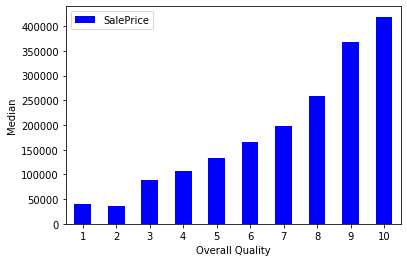

In [19]:
quality_pivot.plot(kind='bar',color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median')
plt.xticks(rotation=0)
plt.show()

SalePrice varies directly with the Overall quality

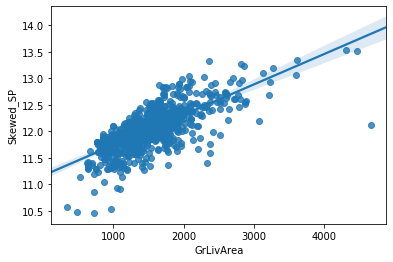

In [20]:
sns.regplot(x='GrLivArea',y='Skewed_SP',data=train)

SalePrice increases as the GrLivArea increases.  We will also get rid of the outliers which severely affect the prediction of the survival rate.

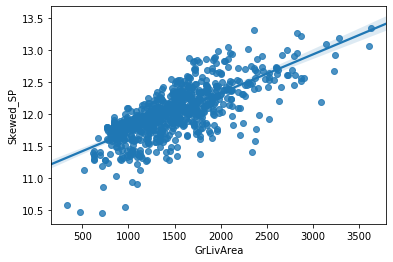

In [21]:
#Removing outliers
train = train[train['GrLivArea'] < 4000]
sns.regplot(x='GrLivArea',y='Skewed_SP',data=train)

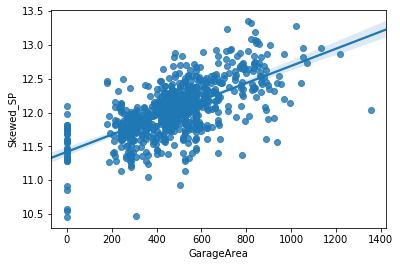

In [22]:
sns.regplot(x='GarageArea',y='Skewed_SP',data=train)

GarageArea and SalePrice are directly proportional. 

We will again get rid of the outliers.

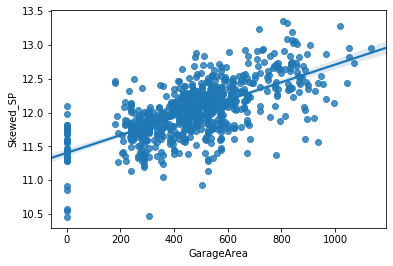

In [23]:
#Removing outliers
train = train[train['GarageArea'] < 1200]
sns.regplot(x='GarageArea',y='Skewed_SP',data=train)

In [24]:
#Removing the null values
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
PoolQC,776
MiscFeature,750
Alley,738
Fence,635
FireplaceQu,367
LotFrontage,143
GarageQual,33
GarageCond,33
GarageFinish,33


In [25]:
# Pool null value refers to no pool area
print ("Unique values are:", train.MiscFeature.unique())

Unique values are: [nan 'Shed' 'Gar2' 'Othr']


In [26]:
#Analysing the non numeric data 
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe(include='all')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,777,777,39,777,777,777,777,777,777,777,...,744,744,744,744,777,1,142,27,777,777
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,4,3,1,4,3,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Fa,MnPrv,Shed,WD,Normal
freq,608,773,22,483,699,776,562,734,112,669,...,486,329,710,722,717,1,76,24,666,636


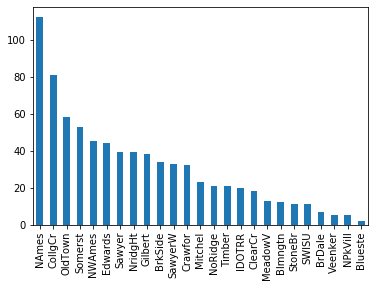

In [27]:
train['Neighborhood'].value_counts().plot(kind='bar')

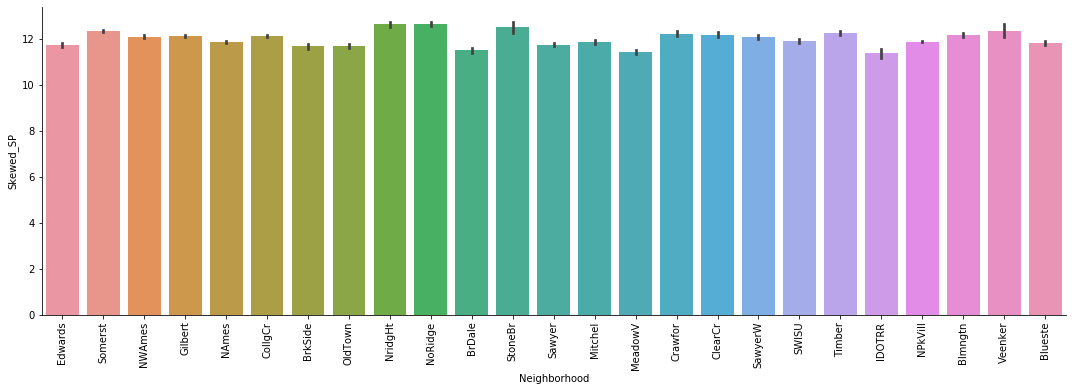

In [28]:
g = sns.factorplot(x='Neighborhood', y='Skewed_SP', data=train, kind='bar', aspect=3)
g.set_xticklabels(rotation=90)

In [29]:
train['Condition1'].value_counts()

Norm      669
Feedr      36
Artery     28
RRAn       16
PosN        9
RRAe        7
PosA        6
RRNn        4
RRNe        2
Name: Condition1, dtype: int64

In [30]:
train['Condition2'].value_counts()

Norm     770
Feedr      5
RRNn       1
PosA       1
Name: Condition2, dtype: int64

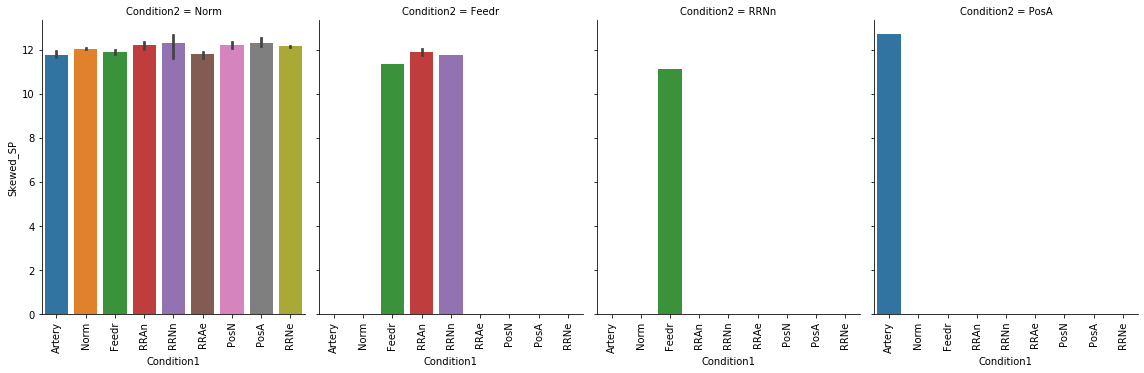

In [31]:
g = sns.factorplot(x='Condition1', y='Skewed_SP', col='Condition2', data=train, kind='bar', col_wrap=4, aspect=0.8)
g.set_xticklabels(rotation=90)

In [32]:
train['SaleCondition'].value_counts()

Normal     636
Partial     72
Abnorml     53
Family       7
Alloca       6
AdjLand      3
Name: SaleCondition, dtype: int64

In [33]:
train['SaleType'].value_counts()

WD       666
New       70
COD       28
ConLD      4
ConLw      3
CWD        2
Con        2
Oth        1
ConLI      1
Name: SaleType, dtype: int64

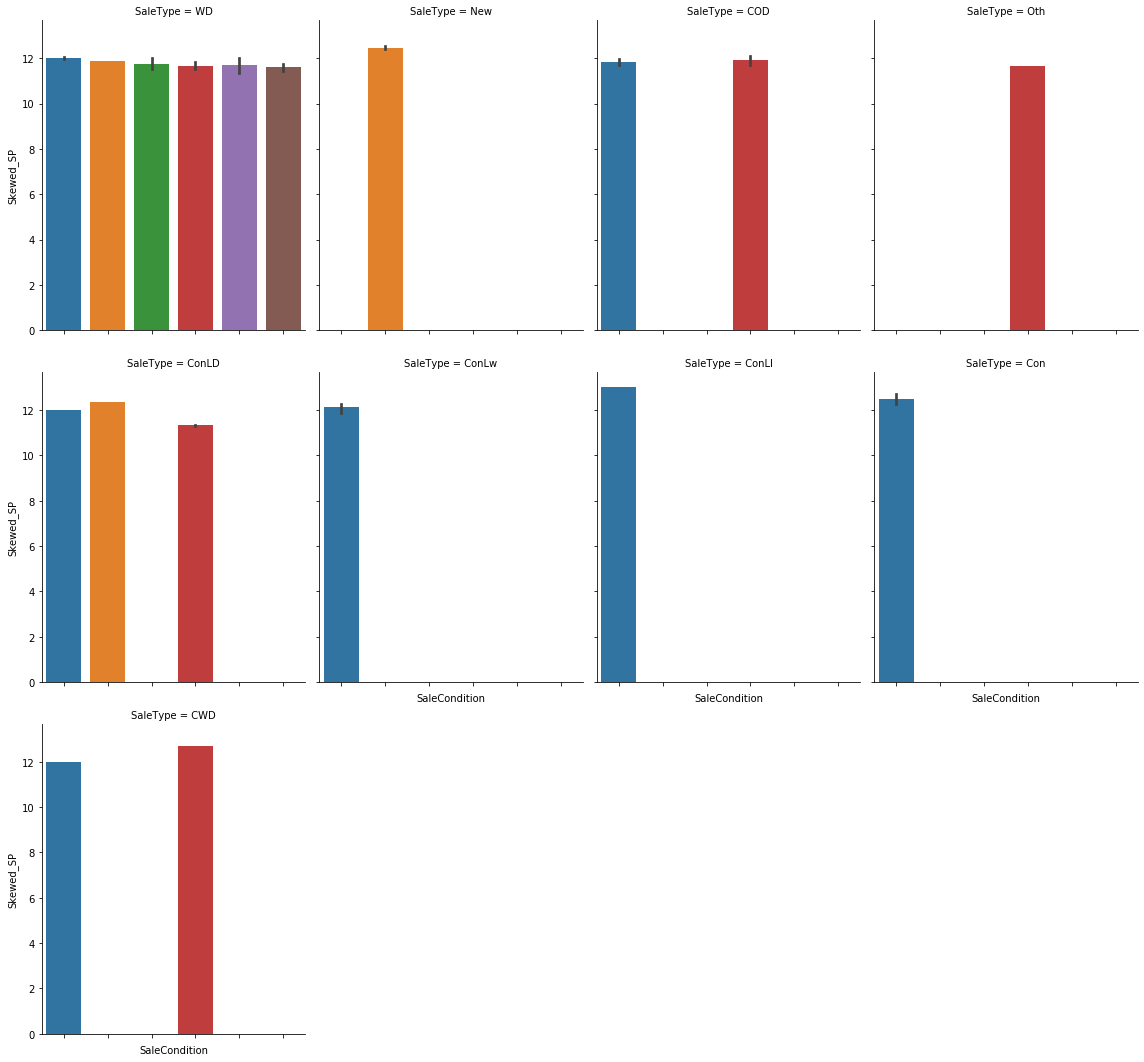

In [34]:
g = sns.factorplot(x='SaleCondition', y='Skewed_SP', col='SaleType', data=train, kind='bar', col_wrap=4, aspect=0.8)
g.set_xticklabels(rotation=90)

In [35]:
#Data Trasformation 
print ("Original: \n") 
print (train.Street.value_counts(), "\n")

Original: 

Pave    773
Grvl      4
Name: Street, dtype: int64 



In [36]:
# Turn into one hot encoding 
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(train.Street, drop_first=True)

In [37]:
# Encoded 
print ('Encoded: \n') 
print (train.enc_street.value_counts())

Encoded: 

1    773
0      4
Name: enc_street, dtype: int64


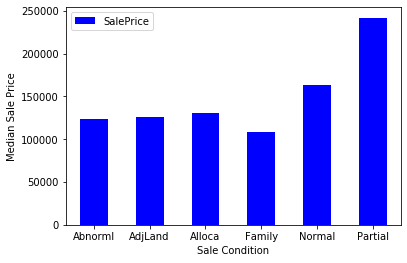

In [38]:
# Feature Engineering
condition_pivot = train.pivot_table(index='SaleCondition',
                                    values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [39]:
def encode(x): return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

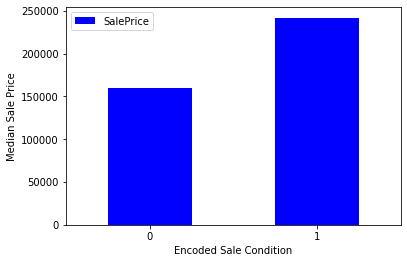

In [40]:
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [41]:
#Interpolation of data 
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

In [42]:
sum(data.isnull().sum() != 0)

0

In [43]:
# Linear Model for the  train and test
y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=.33)

In [45]:
from sklearn import linear_model
from sklearn import ensemble

#lr =  ensemble.RandomForestRegressor(n_estimators = 100, oob_score = True, n_jobs = -1,random_state =50,max_features = "sqrt", min_samples_leaf = 50)
#lr = linear_model.LinearRegression()
lr = ensemble.GradientBoostingRegressor()
#lr = linear_model.TheilSenRegressor()
#lr = linear_model.RANSACRegressor(random_state=50)

In [46]:
model = lr.fit(X_train, y_train)

In [47]:
print ("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.999671174354133


In [48]:
predictions = model.predict(X_test)

In [49]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 5.3782432609201725e-05


Text(0.5, 1.0, 'Linear Regression Model')

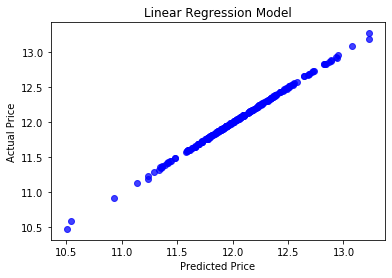

In [50]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
#pltrandom_state=None.show()

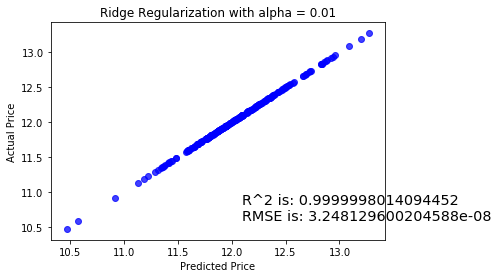

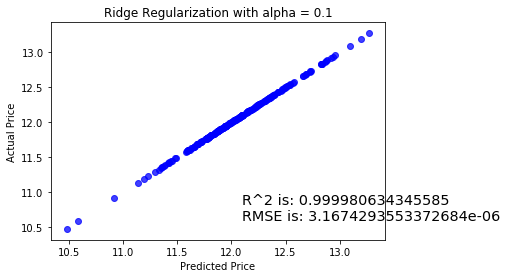

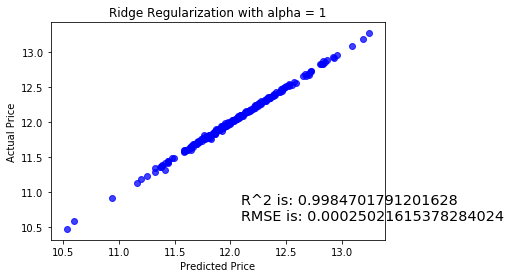

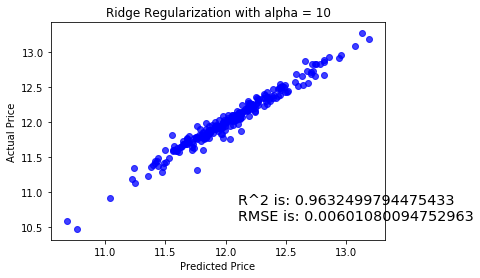

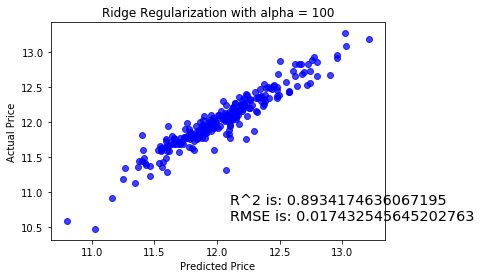

In [51]:
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)
    
    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

In [52]:
submission = pd.DataFrame()
submission['Id'] = test.Id

In [53]:
feats = test.select_dtypes(
        include=[np.number]).drop(['Id'], axis=1).interpolate()


In [54]:
predictions = model.predict(feats)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
feats

In [ ]:
final_predictions = np.exp(predictions)

In [ ]:
print ("Original predictions are: \n", predictions[:5], "\n")
print ("Final predictions are: \n", final_predictions[:5])

In [ ]:
submission['SalePrice'] = final_predictions
submission.head()

In [ ]:
submission.to_csv('submission1.csv', index=False)